# Pandas

Pandas has plotting built in, it provides convient ways to quickly make plots. Let demonstate pandas built in plot with a short EDA on the iris dataset.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (13, 8) #deault figure size

By default the pandas plots look kind of ugly, thankfully we can easily change that.

In [ ]:
plt.style.use('ggplot') #make plot prettier

The are many of styles avlaible which can be found here.

In [13]:
plt.style.available 

['seaborn-colorblind',
 'seaborn-poster',
 'seaborn-darkgrid',
 'seaborn-talk',
 'seaborn-pastel',
 'seaborn-deep',
 'seaborn-dark-palette',
 'fivethirtyeight',
 'grayscale',
 'Solarize_Light2',
 'seaborn-muted',
 'seaborn-dark',
 '_classic_test',
 'dark_background',
 'seaborn-whitegrid',
 'ggplot',
 'seaborn-ticks',
 'tableau-colorblind10',
 'seaborn-paper',
 'seaborn',
 'seaborn-notebook',
 'seaborn-bright',
 'fast',
 'bmh',
 'classic',
 'seaborn-white']

In [3]:
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


The classes are nicely balanced.

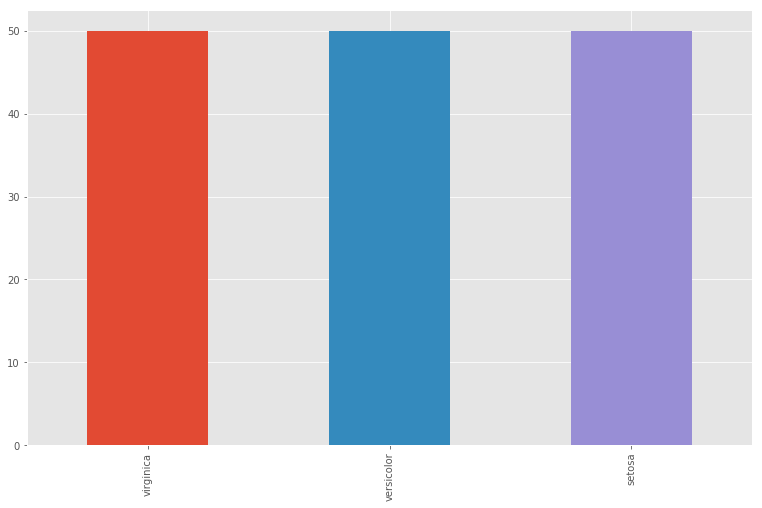

In [80]:
df.species.value_counts().plot('bar') 

Petal width looks like a good feature to classify setosa by due to it low mean compared to the others.

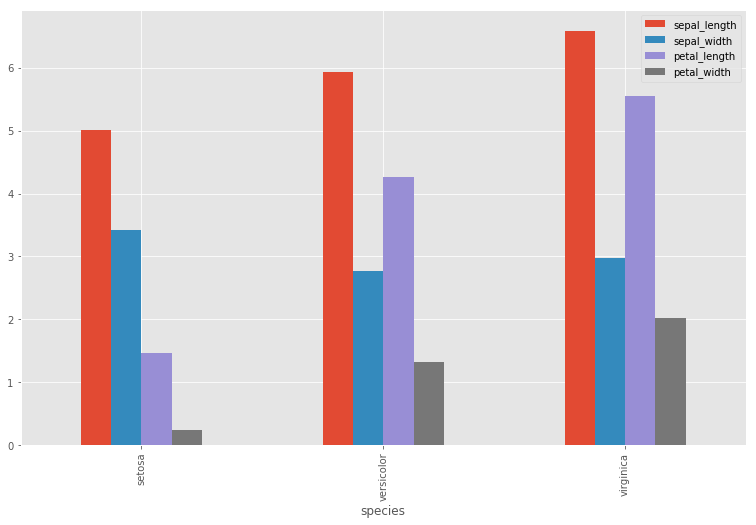

In [82]:
df.groupby('species').mean().plot.bar() 

Let take a close look be using `.kde` to visulize the distributions.Looking at the dataset we can see that two of the features petal width and petal length are bimodal, this gives us some intution that they may potentially be good feautre to seperate the classes by.

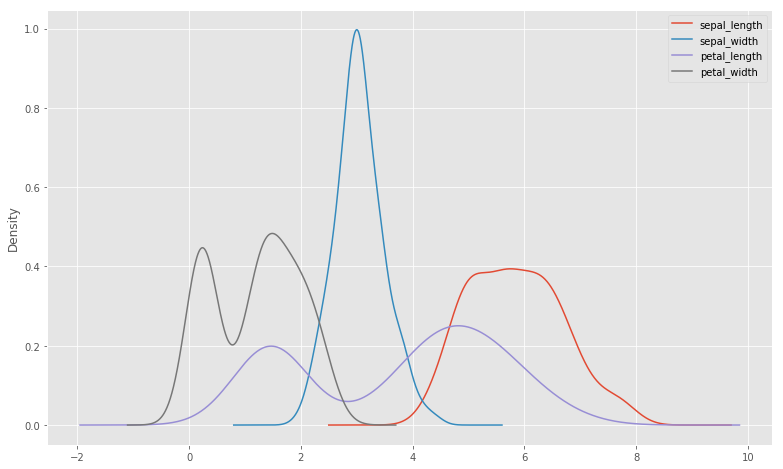

In [83]:
df.plot.kde()

We can group by species to take a closeer look at petal width. We clearly see that petal width would be a good feature to seperatre the classes of flowers on, especially for setosa since the distributions don't overlap much if at all.

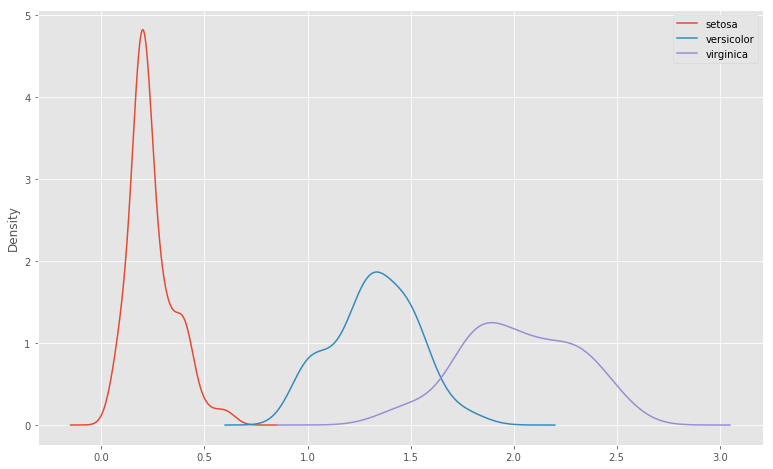

In [84]:
s = df.groupby('species').petal_width.plot.kde()
s.apply(lambda ax: ax.legend());

In contrast sepal length isn't such as great feature to seperate the flowers on due the the greater overlap in the distributions

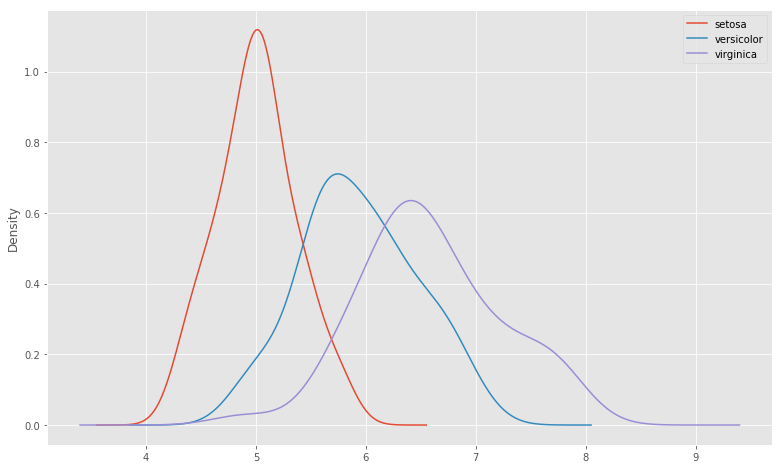

In [85]:
s = df.groupby('species').sepal_length.plot.kde()
s.apply(lambda ax: ax.legend());

Petal length is the feautre that has the greatest standard deviation among the flowers. 

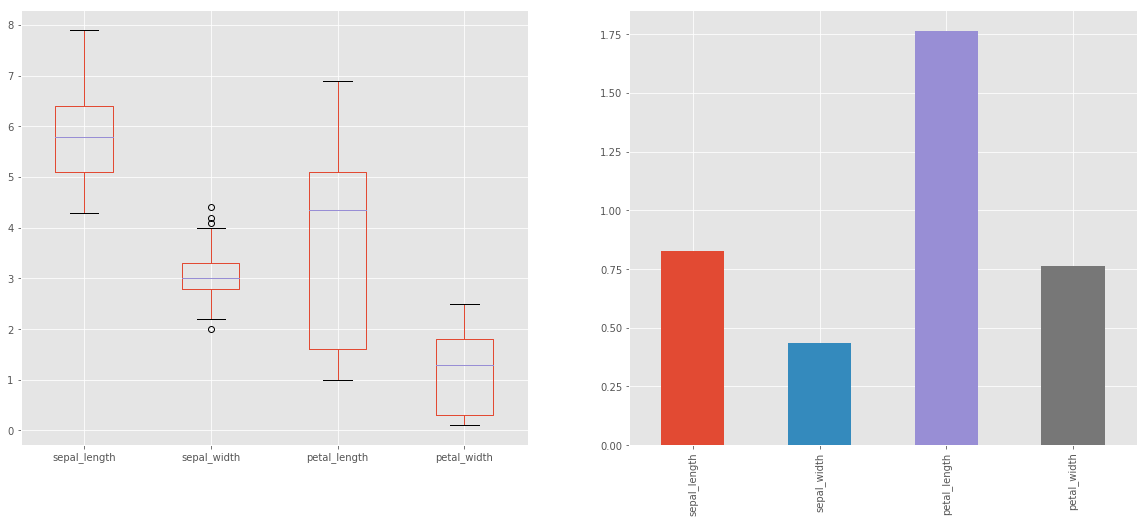

In [86]:
fig, axes = plt.subplots(1,2,figsize=(20,8))
df.plot.box(ax=axes[0])
df.std().plot.bar(ax=axes[1])